Kunskapskontroll SQL

Teoretiska Frågor

1. Beskriv kort hur en relationsdatabas fungerar.
    En relationsdatabas lagrar data i tabeller som är kopplade till varandra genom relationer. Man använder primära och främmande nycklar för att skapa kopplingar mellan tabeller och hantera data på ett strukturerat och effektivt sätt.

2. Vad menas med “CRUD”-flödet?
    CRUD står för Create, Read, Update och Delete. Det beskriver de grundläggande operationerna man gör med data i en databas:
        Create: Skapa ny data (INSERT).
        Read: Läsa eller hämta data (SELECT).
        Update: Uppdatera befintlig data (UPDATE).
        Delete: Ta bort data (DELETE).

3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
    - Left join: Hämtar alla rader från den vänstra tabellen och matchande rader från den högra tabellen.
    - Inner join: Hämtar endast de rader där det finns en match i båda tabellerna.

    Man använder dessa joins för att kombinera data från flera tabeller och få en mer detaljerad bild av informationen.

4. Beskriv kort vad indexering i SQL innebär.
    Indexering gör det snabbare att söka efter data i en tabell. När man skapar ett index på en kolumn kan databasen använda det för att snabbt hitta de rader man letar efter, istället för att gå igenom hela tabellen rad för rad. Det är särskilt användbart vid stora tabeller och kan också göra joins och filtreringar mycket snabbare.

5. Beskriv kort vad en vy i SQL är.
    En vy är som en virtuell tabell som skapas från en query. Den gör det lättare att hantera och presentera data eftersom man slipper köra komplexa queries varje gång man behöver datan. Vy kan också användas för att dela utvald information med personer som inte har fullständig tillgång till databasen, vilket gör den användbar för säkerhet och behörighetshantering.

6. Beskriv kort vad en lagrad procedur i SQL är.
    En lagrad procedur är sparad kod i databasen som kan återanvändas för att utföra specifika uppgifter. Den är snabbare att använda än att skriva samma kod flera gånger och kan ha parametrar för att anpassa resultatet. Lagrade procedurer hjälper också till att säkerställa konsistens när flera användare arbetar med samma databas.

Programmeringsuppgift

1- Ge en deskriptiv sammanfattning över databasen AdventureWorks2022. Syftet är att
läsaren skall få en god överblick över datan som finns. Du måste här själv bestämma
vilka SQL-queries du skall göra genom att undersöka och besluta om vad som är
relevant. Självklart kan du, efter att du läst in datan i Python, använda exempelvis
Pandas och Matplotlib för din analys.

In [40]:
# Importer

from sqlalchemy.engine import create_engine, URL
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
SERVER = 'localhost'  # localhost innebär att du ansluter till en server på din egen dator
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)  # engine är anslutningsobjektet vi använder för att kommunicera med databasen.

In [ ]:
# SQL-fråga för att lista tabeller och scheman
query = """
SELECT 
    t.name AS TableName,
    s.name AS SchemaName
FROM sys.tables AS t
JOIN sys.schemas AS s ON t.schema_id = s.schema_id
WHERE t.is_ms_shipped = 0
ORDER BY SchemaName, TableName;
"""

# Läser SQL-frågan i en DataFrame
tables_df = pd.read_sql(query, engine)

# Visa resultatet
print(tables_df)  

                TableName      SchemaName
0          AWBuildVersion             dbo
1             DatabaseLog             dbo
2                ErrorLog             dbo
3             sysdiagrams             dbo
4              Department  HumanResources
..                    ...             ...
67  SalesTerritoryHistory           Sales
68       ShoppingCartItem           Sales
69           SpecialOffer           Sales
70    SpecialOfferProduct           Sales
71                  Store           Sales

[72 rows x 2 columns]


In [16]:
# SQL-fråga för att hämta antal rader per tabell
query = """
SELECT 
    t.name AS TableName,
    s.name AS SchemaName,
    p.rows AS RowCounts
FROM sys.tables AS t
JOIN sys.schemas AS s ON t.schema_id = s.schema_id
JOIN sys.partitions AS p ON t.object_id = p.object_id
WHERE t.is_ms_shipped = 0 AND p.index_id IN (0, 1) 
ORDER BY SchemaName, TableName;
"""

# Läser SQL-frågan i en DataFrame
row_counts_df = pd.read_sql(query, engine)

# Visa resultatet
print(row_counts_df)  # Visar de första raderna


                TableName      SchemaName  RowCounts
0          AWBuildVersion             dbo          1
1             DatabaseLog             dbo       1596
2                ErrorLog             dbo          0
3             sysdiagrams             dbo          0
4              Department  HumanResources         16
..                    ...             ...        ...
67  SalesTerritoryHistory           Sales         17
68       ShoppingCartItem           Sales          3
69           SpecialOffer           Sales         16
70    SpecialOfferProduct           Sales        538
71                  Store           Sales        701

[72 rows x 3 columns]


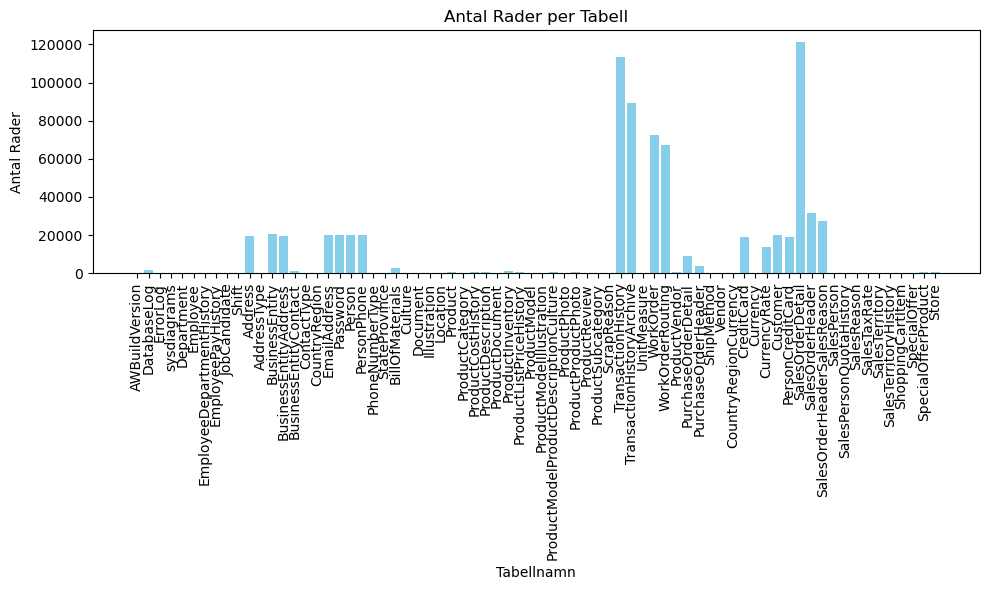

In [41]:
# Visualisera antal rader per tabell med ett stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(row_counts_df['TableName'], row_counts_df['RowCounts'], color='skyblue')
plt.title('Antal Rader per Tabell')
plt.xlabel('Tabellnamn')
plt.ylabel('Antal Rader')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Fråga: Hämta antalet kolumner per tabell i databasen
query = """
SELECT 
    t.name AS TableName,
    s.name AS SchemaName,
    COUNT(c.column_id) AS ColumnCount
FROM sys.tables AS t
JOIN sys.schemas AS s ON t.schema_id = s.schema_id
JOIN sys.columns AS c ON t.object_id = c.object_id
WHERE t.is_ms_shipped = 0
GROUP BY t.name, s.name
ORDER BY SchemaName, TableName;
"""

# Hämta data från databasen och lagra det i en Pandas DataFrame
columns_df = pd.read_sql(query, engine)

# Visa hela resultatet i konsolen
print(columns_df)


                TableName      SchemaName  ColumnCount
0          AWBuildVersion             dbo            4
1             DatabaseLog             dbo            8
2                ErrorLog             dbo            9
3             sysdiagrams             dbo            5
4              Department  HumanResources            4
..                    ...             ...          ...
67  SalesTerritoryHistory           Sales            6
68       ShoppingCartItem           Sales            6
69           SpecialOffer           Sales           11
70    SpecialOfferProduct           Sales            4
71                  Store           Sales            6

[72 rows x 3 columns]


In [20]:
# Total antal rader per schema
query = """
SELECT 
    s.name AS SchemaName,
    SUM(p.rows) AS TotalRowCount
FROM sys.tables AS t
JOIN sys.schemas AS s ON t.schema_id = s.schema_id
JOIN sys.partitions AS p ON t.object_id = p.object_id
WHERE t.is_ms_shipped = 0 AND p.index_id IN (0, 1)
GROUP BY s.name
ORDER BY TotalRowCount DESC;
"""

# Kör frågan och läs in resultatet i en Pandas DataFrame
schema_rowcount_df = pd.read_sql(query, engine)

# Skriv ut resultatet som en tabell utan index
print(schema_rowcount_df)


       SchemaName  TotalRowCount
0      Production         349895
1           Sales         253735
2          Person         141250
3      Purchasing          13426
4             dbo           1597
5  HumanResources            934


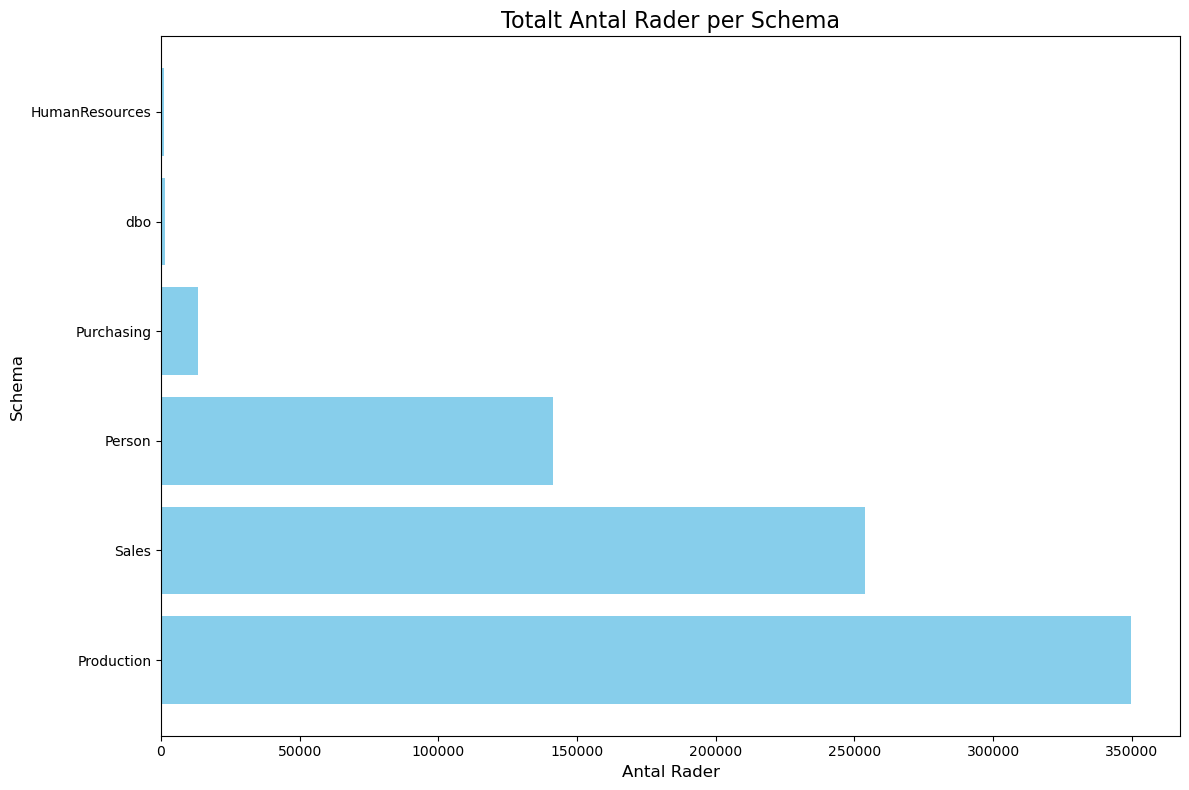

In [52]:
# Visualisera det totala antalet rader per schema
plt.figure(figsize=(12, 8))
plt.barh(schema_rowcount_df['SchemaName'], schema_rowcount_df['TotalRowCount'], color='skyblue')

# Lägg till etiketter och titel
plt.title('Totalt Antal Rader per Schema', fontsize=16)
plt.xlabel('Antal Rader', fontsize=12)
plt.ylabel('Schema', fontsize=12)
plt.tight_layout()

plt.show()

In [22]:
# Sortera tabeller efter antal rader
query = """
SELECT 
    t.name AS TableName,
    s.name AS SchemaName,
    p.rows AS RowCounts
FROM sys.tables AS t
JOIN sys.schemas AS s ON t.schema_id = s.schema_id
JOIN sys.partitions AS p ON t.object_id = p.object_id
WHERE t.is_ms_shipped = 0 AND p.index_id IN (0, 1)
ORDER BY RowCounts DESC;
"""

# Kör frågan och läs in resultatet i en Pandas DataFrame
table_rowcount_df = pd.read_sql(query, engine)

# Skriv ut resultatet som en tabell utan index
print(table_rowcount_df)


                    TableName      SchemaName  RowCounts
0            SalesOrderDetail           Sales     121317
1          TransactionHistory      Production     113443
2   TransactionHistoryArchive      Production      89253
3                   WorkOrder      Production      72591
4            WorkOrderRouting      Production      67131
..                        ...             ...        ...
67           ShoppingCartItem           Sales          3
68                      Shift  HumanResources          3
69             AWBuildVersion             dbo          1
70                   ErrorLog             dbo          0
71                sysdiagrams             dbo          0

[72 rows x 3 columns]


In [25]:
# Hämta primära nycklar för tabeller
query = """
SELECT 
    t.name AS TableName,
    c.name AS ColumnName,
    pk.name AS PrimaryKeyName
FROM sys.tables AS t
JOIN sys.columns AS c ON t.object_id = c.object_id
JOIN sys.key_constraints AS pk ON t.object_id = pk.parent_object_id
WHERE pk.type = 'PK'
ORDER BY TableName, ColumnName;
"""

# Kör frågan och läs in resultatet i en Pandas DataFrame
primary_keys_df = pd.read_sql(query, engine)

# Skriv ut resultatet som en tabell utan index
print(primary_keys_df.head())


  TableName    ColumnName        PrimaryKeyName
0   Address     AddressID  PK_Address_AddressID
1   Address  AddressLine1  PK_Address_AddressID
2   Address  AddressLine2  PK_Address_AddressID
3   Address          City  PK_Address_AddressID
4   Address  ModifiedDate  PK_Address_AddressID


In [27]:
# Hämta främmande nycklar för tabeller
query = """
SELECT 
    fk.name AS ForeignKeyName,               -- Namnet på den främmande nyckeln
    tp.name AS ParentTable,                   -- Tabell med den främmande nyckeln
    ref.name AS ReferencedTable,              -- Refererad tabell
    c1.name AS ParentColumn,                  -- Kolumn med främmande nyckel
    c2.name AS ReferencedColumn              -- Kolumn i den refererade tabellen
FROM sys.foreign_keys AS fk                   -- Hämtar främmande nycklar
INNER JOIN sys.foreign_key_columns AS fkc           -- Hämtar kolumner för främmande nycklar
    ON fk.object_id = fkc.constraint_object_id
INNER JOIN sys.tables AS tp                         -- Hämtar tabellen med främmande nyckeln
    ON tp.object_id = fkc.parent_object_id
INNER JOIN sys.tables AS ref                        -- Hämtar refererade tabell
    ON ref.object_id = fkc.referenced_object_id
INNER JOIN sys.columns AS c1                        -- Hämtar kolumn i tabellen med främmande nyckel
    ON c1.column_id = fkc.parent_column_id AND c1.object_id = tp.object_id
INNER JOIN sys.columns AS c2                        -- Hämtar kolumn i den refererade tabellen
    ON c2.column_id = fkc.referenced_column_id AND c2.object_id = ref.object_id
ORDER BY ParentTable, ForeignKeyName;             -- Sorterar efter tabell och främmande nyckel
"""

# Kör frågan och läs in resultatet i en Pandas DataFrame
foreign_keys_df = pd.read_sql(query, engine)

# Skriv ut resultatet som en tabell utan index
print(foreign_keys_df)


                                    ForeignKeyName            ParentTable  \
0         FK_Address_StateProvince_StateProvinceID                Address   
1           FK_BillOfMaterials_Product_ComponentID        BillOfMaterials   
2     FK_BillOfMaterials_Product_ProductAssemblyID        BillOfMaterials   
3   FK_BillOfMaterials_UnitMeasure_UnitMeasureCode        BillOfMaterials   
4       FK_BusinessEntityAddress_Address_AddressID  BusinessEntityAddress   
..                                             ...                    ...   
86       FK_Vendor_BusinessEntity_BusinessEntityID                 Vendor   
87                  FK_WorkOrder_Product_ProductID              WorkOrder   
88          FK_WorkOrder_ScrapReason_ScrapReasonID              WorkOrder   
89         FK_WorkOrderRouting_Location_LocationID       WorkOrderRouting   
90       FK_WorkOrderRouting_WorkOrder_WorkOrderID       WorkOrderRouting   

   ReferencedTable       ParentColumn  ReferencedColumn  
0    StateProvinc

En deskriptiv sammanfattning över databasen AdventureWorks2022 baserat på de SQL-frågor och resultat som jag har kommit fram till:

1. Allmän översikt av databasen
Databasen AdventureWorks2022 har delat upp i flera scheman, som tillhör olika tabeller. Dessa scheman är:

- dbo (DataBase Owner): Har tabeller som AWBuildVersion, DatabaseLog, och ErrorLog. De tabeller innehåller loggar och versioneringsinformation.

- HumanResources: Detta schema fokus på anställda bland annat Employee, Department, Shift.

- Person: Har information om individer, adresser och kontakter exempelvis Person, Address, och EmailAddress.

- Production: Fokus på produktionsdata och har tabeller som Product, BillOfMaterials, WorkOrder.

- Purchasing: Hanterar data som relaterad till  inköp som Vendor, PurchaseOrderHeader, och ShipMethod.

- Sales: Hanterar data som kopplat till försäljning såsom SalesOrderDetail, Customer, och SalesTerritory.

2. Antal rader per schema

Utifrån information om rader per schema kan identifieras vilka schema som innehåller mest data:

- Production: 349,895 rader (mest omfattande schemat).

- Sales: 253,735 rader.

- Person: 141,250 rader.

- Purchasing: 13,426 rader.

- dbo: 1,597 rader.

- HumanResources: 934 rader.

Schema som hanterar produktionsdata och försäljningsdata innehåller mest data.

3. Tabellinformation

Resultat visar att tabellerna varierar i båda storlek och syfte. exempel på tabellerna är:

- De största tabellerna är SalesOrderDetail (121,317 rader) och TransactionHistory (113,443 rader). De har detaljerad historik och transaktionsdata.

- Det finns också mindre tabeller som Shift (3 rader) och Culture (8 rader). De används för referensdata.

4. Antal kolumner per tabell

De visar komplexitet. Databasen har tabeller med mindre antal kolumner som ContactType (3 kolumner). Den har även tabeller med mycket antal kolumner som SalesOrderHeader (26 kolumner). Det visar att visa tabeller är mer detaljerad och omfattande.

5. Nycklar och relationer

Databasen har många relationer mellan tabeller genom primär nycklar och främmande nycklar: Till exempel SalesOrderDetail relaterar till SalesOrderHeader via SalesOrderID och Product via ProductID.

Det visar att databasen är starkt normaliserad. Detta gör databasen optimerad för att hantera relationsdata.

6. Huvudsyften med databasen

Utifrån resultat ser vi att databasen används för att stödja en organisation inom flera affärsprocesser:

- Personalhantering: Exempelvis tabeller som Employee och Department.

- Försäljning och kundhantering: Exempelvis tabeller som Customer, SalesOrderHeader och SalesTerritory.

- Produktion och lagerhållning: Exempelvis tabeller som Product, BillOfMaterials och WorkOrder.

- Loggning och övervakning: Exempelvis tabeller som DatabaseLog och ErrorLog.

2- Gör en statistisk analys av valfri del av datan. Den skall innehålla åtminstone ett
konfidensintervall. Hur tolkar du resultaten?

In [30]:
# Fråga: Hämta alla kolumner från SalesOrderDetail
query = "SELECT * FROM Sales.SalesOrderDetail"
sales_order_details_df = pd.read_sql(query, engine)

# Skriv ut de första 5 raderna av resultatet
print(sales_order_details_df.head())

   SalesOrderID  SalesOrderDetailID CarrierTrackingNumber  OrderQty  \
0         43659                   1          4911-403C-98         1   
1         43659                   2          4911-403C-98         3   
2         43659                   3          4911-403C-98         1   
3         43659                   4          4911-403C-98         1   
4         43659                   5          4911-403C-98         1   

   ProductID  SpecialOfferID  UnitPrice  UnitPriceDiscount  LineTotal  \
0        776               1   2024.994                0.0   2024.994   
1        777               1   2024.994                0.0   6074.982   
2        778               1   2024.994                0.0   2024.994   
3        771               1   2039.994                0.0   2039.994   
4        772               1   2039.994                0.0   2039.994   

                                rowguid ModifiedDate  
0  B207C96D-D9E6-402B-8470-2CC176C42283   2011-05-31  
1  7ABB600D-1E77-41BE-9F

In [33]:
# Hämta värdena för LineTotal från tabellen SalesOrderDetail
query = "SELECT LineTotal FROM Sales.SalesOrderDetail"
line_total_df = pd.read_sql(query, engine)

# Skriv ut de första 5 raderna av resultatet
print(line_total_df.head())


   LineTotal
0   2024.994
1   6074.982
2   2024.994
3   2039.994
4   2039.994


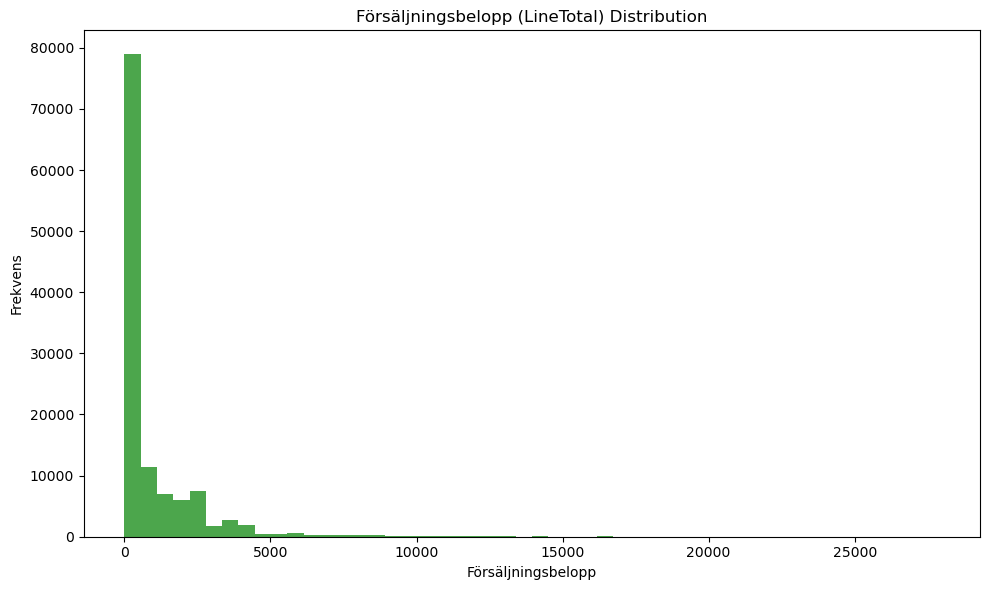

In [42]:
# Visualisera distributionen av försäljningsbelopp med ett histogram
plt.figure(figsize=(10, 6))
plt.hist(line_total_df['LineTotal'], bins=50, color='green', alpha=0.7)
plt.title('Försäljningsbelopp (LineTotal) Distribution')
plt.xlabel('Försäljningsbelopp')
plt.ylabel('Frekvens')
plt.tight_layout()
plt.show()

In [34]:
# Hämta statistisk sammanfattning för LineTotal
query = """
SELECT 
    AVG(LineTotal) AS Mean,
    STDEV(LineTotal) AS StdDev,
    MIN(LineTotal) AS MinValue,
    MAX(LineTotal) AS MaxValue,
    COUNT(LineTotal) AS TotalCount
FROM Sales.SalesOrderDetail;
"""
summary_df = pd.read_sql(query, engine)

# Skriv ut resultatet
print(summary_df)

         Mean       StdDev  MinValue   MaxValue  TotalCount
0  905.449206  1693.417389     1.374  27893.619      121317


In [36]:
# Bygg ett konfidensintervall för LineTotal
query = """
SELECT 
    AVG(LineTotal) AS Mean,
    STDEV(LineTotal) AS StdDev,
    COUNT(LineTotal) AS TotalCount,
    AVG(LineTotal) - 1.96 * (STDEV(LineTotal) / SQRT(COUNT(LineTotal))) AS LowerBound,
    AVG(LineTotal) + 1.96 * (STDEV(LineTotal) / SQRT(COUNT(LineTotal))) AS UpperBound
FROM Sales.SalesOrderDetail;
"""
confidence_interval_df = pd.read_sql(query, engine)

# Skriv ut resultatet
print(confidence_interval_df)

         Mean       StdDev  TotalCount  LowerBound  UpperBound
0  905.449206  1693.417389      121317  895.919944  914.978468


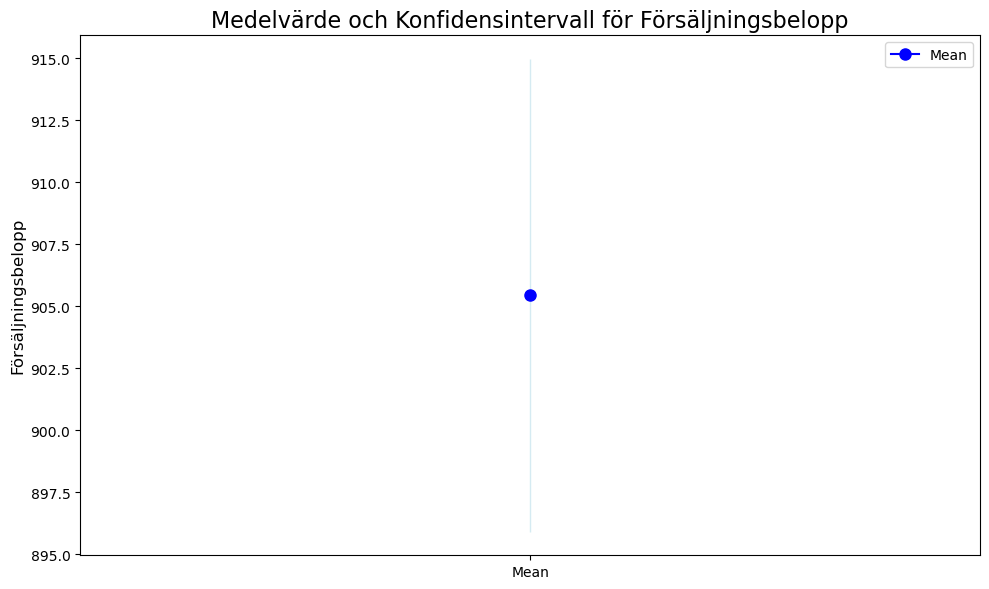

In [50]:
# Visualisera medelvärdet och konfidensintervallet som ett intervall
plt.figure(figsize=(10, 6))

# Fyll intervallområdet mellan LowerBound och UpperBound med ljus färg
plt.fill_between(['Mean'], 
                 [confidence_interval_df['LowerBound'][0]], 
                 [confidence_interval_df['UpperBound'][0]], 
                 color='lightblue', alpha=0.5)

# Lägg till medelvärdet som en linje
plt.plot(['Mean'], [confidence_interval_df['Mean'][0]], color='blue', marker='o', markersize=8, label='Mean')

# Lägg till etiketter
plt.title('Medelvärde och Konfidensintervall för Försäljningsbelopp', fontsize=16)
plt.ylabel('Försäljningsbelopp', fontsize=12)

# Visa legend och förbättra layouten
plt.legend()
plt.tight_layout()

plt.show()

In [37]:
# Identifiera de 10 topprodukterna baserat på försäljning
query = """
SELECT TOP 10 
    A.ProductID, 
    SUM(A.LineTotal) AS TotalSales, 
    B.Name AS ProductName
FROM Sales.SalesOrderDetail AS A
JOIN Production.Product AS B
ON A.ProductID = B.ProductID
GROUP BY A.ProductID, B.Name
ORDER BY TotalSales DESC;
"""
top_products_df = pd.read_sql(query, engine)

# Skriv ut resultatet
print(top_products_df)


   ProductID    TotalSales              ProductName
0        782  4.400593e+06   Mountain-200 Black, 38
1        783  4.009495e+06   Mountain-200 Black, 42
2        779  3.693678e+06  Mountain-200 Silver, 38
3        780  3.438479e+06  Mountain-200 Silver, 42
4        781  3.434257e+06  Mountain-200 Silver, 46
5        784  3.309673e+06   Mountain-200 Black, 46
6        793  2.516857e+06       Road-250 Black, 44
7        794  2.347656e+06       Road-250 Black, 48
8        795  2.012448e+06       Road-250 Black, 52
9        753  1.847819e+06         Road-150 Red, 56


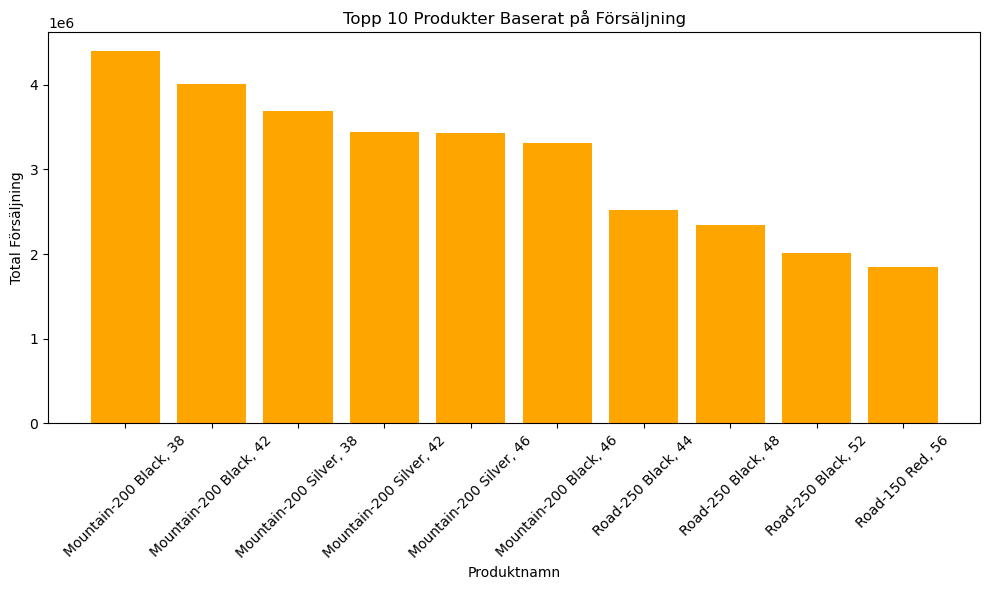

In [43]:
# Visualisera de 10 topprodukterna med ett stapeldiagram
plt.figure(figsize=(10, 6))
plt.bar(top_products_df['ProductName'], top_products_df['TotalSales'], color='orange')
plt.title('Topp 10 Produkter Baserat på Försäljning')
plt.xlabel('Produktnamn')
plt.ylabel('Total Försäljning')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

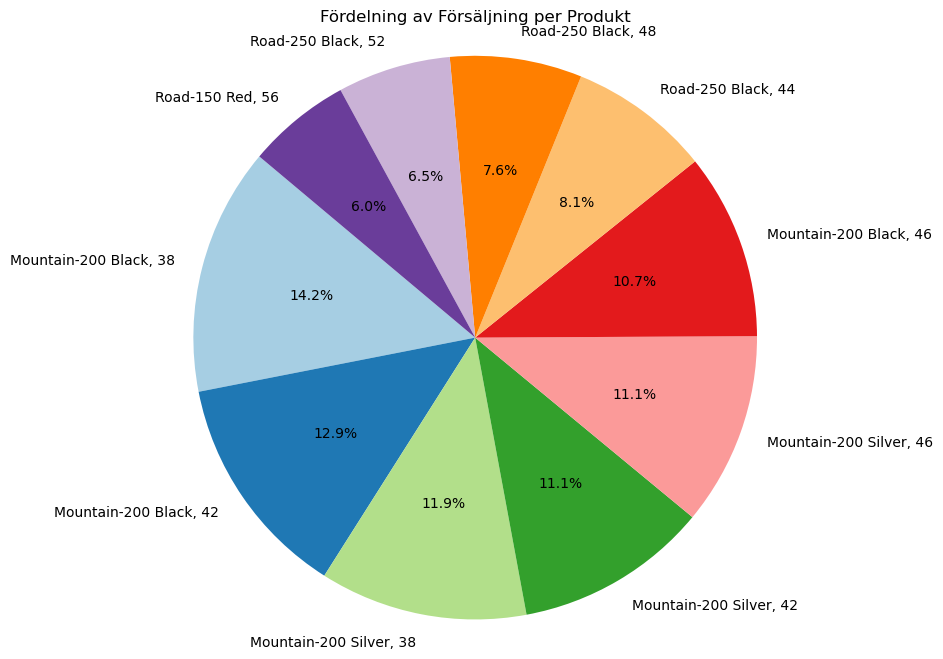

In [46]:
# Om vi vill visualisera försäljningens fördelning mellan de 10 topprodukterna
top_products = pd.read_sql("SELECT TOP 10 A.ProductID, SUM(A.LineTotal) AS TotalSales, B.Name AS ProductName FROM Sales.SalesOrderDetail AS A JOIN Production.Product AS B ON A.ProductID = B.ProductID GROUP BY A.ProductID, B.Name ORDER BY TotalSales DESC", engine)

plt.figure(figsize=(8, 8))
plt.pie(top_products['TotalSales'], labels=top_products['ProductName'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Fördelning av Försäljning per Produkt')
plt.axis('equal')  # Gör cirkeldiagrammet till en cirkel
plt.show()


En presentation av resultatet av min statistiska analys:

Sammanfattning av resultaten av den statistiska analysen som jag genomfört på data
- Medelvärde (Mean): 905,45
- Standardavvikelse (StdDev): 1693,42
- Antal (TotalCount): 121,317 rader
- Konfidensintervall: Från 895,92 till 914,98 för medelvärdet

Tolkning:
- Medelvärde (Mean) indikerar den genomsnittliga försäljningen per orderrad.
- Standardavvikelse (StdDev) är hög, vilket betyder att det finns stor variation i försäljningsbeloppen. Detta kan indikera att vissa försäljningsposter är mycket större än andra.
- Konfidensintervallet indikerar att vi är 95% säkra på att det verkliga medelvärdet ligger inom intervallet 895,92 och 914,98.


3- Analysera datan och resultaten du tagit fram. Vilka slutsatser och rekommendationer
kan du ge?

Resultaten av analysen:
En djupare analys av de resultat som jag presenterade i fråga 2:
- Försäljningsdatan visar att et finns stor skillnad i försäljning mellan olika orderrader.  Det kan betyda att vissa produkter eller kundgrupper bidrar med mycket mer försäljning än andra.
- Konfidensintervallet (895,92 till 914,98) visar ett ungefärligt medelvärde för försäljningen. Trots variationen i försäljningen är det genomsnittliga försäljningsvärdet nära det vi har beräknat.
- Den höga standardavvikelsen (1693,42) tyder på att det kan finnas några få order med väldigt hög försäljning som påverkar resultaten mycket.


Rekommendationer:
- Fokusera på de bästa produkterna: Företaget kan satsa mer på marknadsföring och lager av de mest sålda produkterna, som till exempel Mountain-200 Black, 38 och Road-250 Black, 44.
- Analysera produkter med låg försäljning: Det är viktigt att undersöka varför vissa produkter säljer dåligt. Det kan handla om problem med marknadsföring, låg efterfrågan eller andra faktorer.
- Förbättra produktutbudet: Genom att se vilka produkter och varianter som är mest populära kan företaget justera sitt utbud och hantera lagret mer effektivt.

4- Sammanfattning för chefer (Executive Summary):
- Databasen innehåller över 121,000 rader med försäljningsdata, vilket ger en omfattande överblick över företagets försäljning.
- Genomsnittligt försäljningsbelopp per orderrad är 905,45, men det finns stora variationer, vilket tyder på skillnader i produktpriser och orderstorlekar.
- Konfidensintervallet (895,92 till 914,98) indikerar att det verkliga medelvärdet med 95 % säkerhet ligger inom detta intervall.
- Mountain-200 Black, 38 är den mest sålda produkten, tillsammans med andra populära produkter som driver försäljningen.
- Rekommendationer:
    - Satsa på marknadsföring och lager för topprodukterna.
    - Analysera produkter med låg försäljning för att identifiera möjliga förbättringsområden.
    - Optimera produktutbudet för att bättre matcha kundernas behov.


5- Skriv vilket datum du gjorde din muntliga presentation av koden.
2025-01-03